# Exploratory Data Analysis

In [1]:
# Constants
DATA_PATH = "../data/processed/1_preprocessed_df.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np

from pathlib import Path
import logging
import pickle

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [3]:
# A function to save figures 
IMAGES_PATH = Path.cwd().parent / "Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Load dataset and make a copy
prep_df = pd.read_pickle(DATA_PATH)
df = prep_df.copy()

In [5]:
df.columns

Index(['country', 'product', 'salesPerWeek', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'product.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label', 'discount', 'day', 'month',
       'year', 'hex_main', 'hex_sec', 'profit'],
      dtype='object')

#### **compute the correlation matrix**

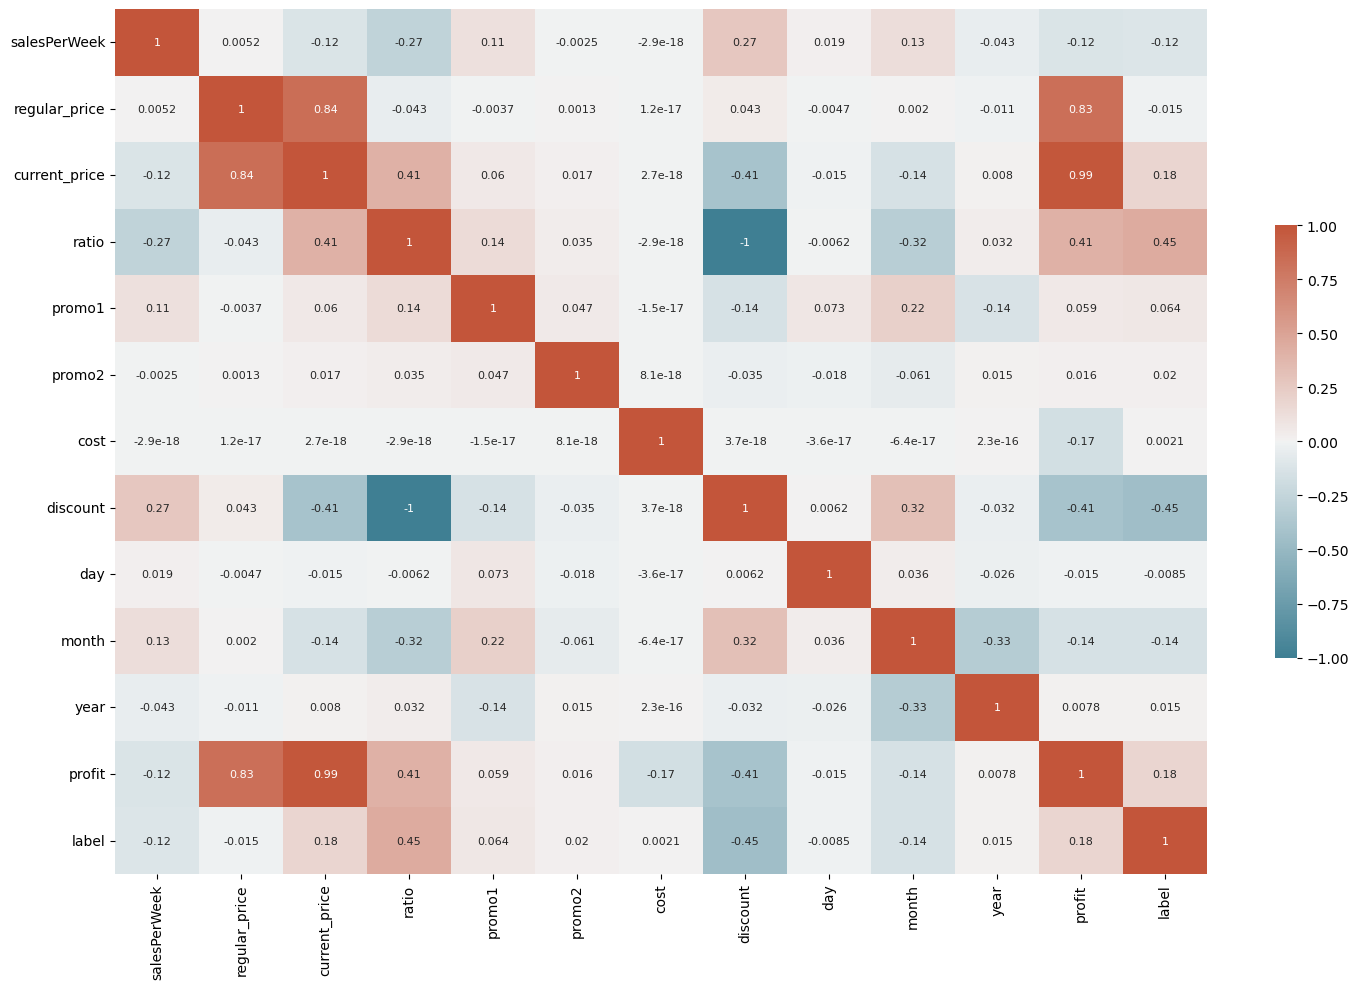

In [6]:
# calculate correlation matrix
cols= ['salesPerWeek', 'regular_price', 'current_price',
       'ratio', 'promo1', 'promo2','cost', 'discount', 'day', 'month',
       'year', 'profit','label']

corr = df[cols].corr(numeric_only= True)# plot the heatmap

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),                        
            cbar_kws={"shrink": .5}, annot=True,annot_kws={"fontsize":8}
            )
save_fig("2-correlation_matrix")

- **From The Correlation matrix we can figure that:**
    - **`salesPerWeak` has a small positive correlation with `discount` column**
    - **`regular_price`s, `current_prices` and `profit` columns have a highly positive correlation**
    - **`discount` has a negative correlation with `profit`**
    - **`discount` has a positive correlation with `month`.**
- **For the `label` column**:
    - **has a negative correlation with `discount`**
    - **has a small negative correlation with `sales` and a small positive correlation with `current_price`**
    

## **Country Column**

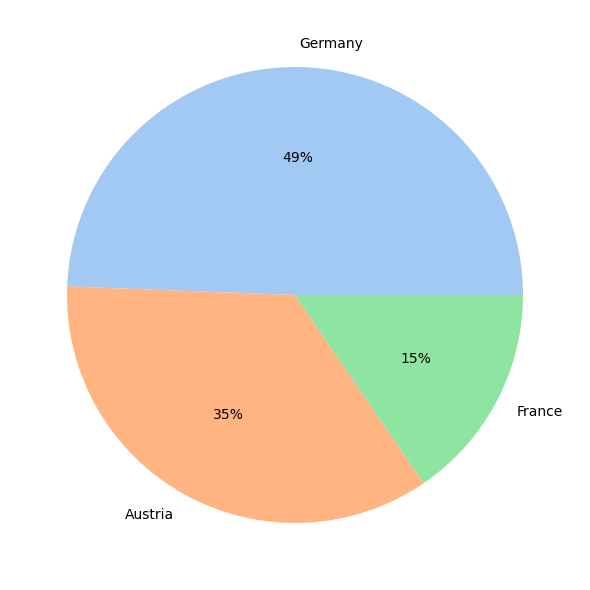

In [104]:
# create a pie plot to calculate the number of occurences of each country

#get the labels and the value_counts of country column
labels = df['country'].unique().tolist()
values = df['country'].value_counts().tolist()

# define Seaborn color palette to use 
palette_color = sns.color_palette('pastel') 

# plotting data on chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%') 

# displaying chart
save_fig("4-country_frequency_pie_chart")
plt.show() 

- **`germany` has the most frequency with `49%`, then `Austria` with `35%` and last `france` with `15%`**

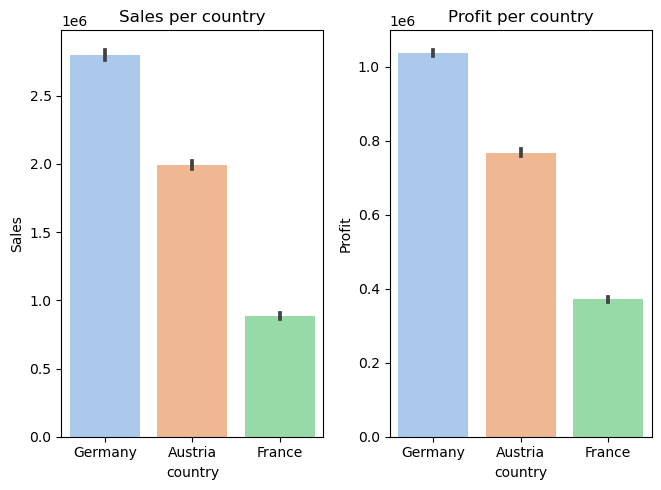

In [106]:
# Create a bar plot to compute sales and profit country
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.barplot(data = df, x= 'country',y='salesPerWeek',estimator='sum')
plt.ylabel('Sales')
plt.title('Sales per country')

# Create a bar plot to compute profit per country
plt.subplot(1, 3, 2)
sns.barplot(data = df, x= 'country',y='profit',estimator='sum')
plt.ylabel('Profit')
plt.title('Profit per country')

plt.tight_layout()  # Adjust the spacing between subplots
save_fig("5-sales_and_profit_per_country")
plt.show()

In [107]:
# compute each country's profit
df.groupby(['country'])['profit'].sum()

country
Austria     768455.62
France      371214.18
Germany    1037710.20
Name: profit, dtype: float64

- **`germany` has the highest amount of `sales` and `profit` followed by `Austria` then `france`**

In [110]:
# Compute the amount of `promo1` per `country`
df.groupby(['country'])['promo1'].sum()

country
Austria    2270
France      900
Germany    3020
Name: promo1, dtype: int64

In [109]:
# Compute the amount of `promo2` per `country`
df.groupby(['country'])['promo2'].sum()

country
Austria      0
France     490
Germany      0
Name: promo2, dtype: int64

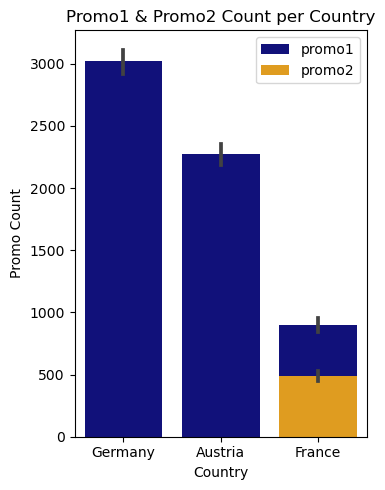

In [111]:
# Create a bar plot to calculate the count of promo1 and promo2 by country

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.barplot(data = df, x= 'country',y='promo1',estimator='sum', label='promo1',color='darkblue')
sns.barplot(data = df, x= 'country',y='promo2',estimator='sum', label='promo2',color='orange')

plt.xlabel('Country')
plt.ylabel('Promo Count')
plt.title('Promo1 & Promo2 Count per Country')

plt.legend()

save_fig('6-promos_count_per_country')
plt.show()

- **Looks like `promo2` took place only in `france`**
- **Also there might be a relationship between the number of `promos` and `sales` in a `country`, but no. of `promos` that happened is less than 10% of the dataset.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   country         100000 non-null  object        
 1   product         100000 non-null  object        
 2   salesPerWeek    100000 non-null  int64         
 3   regular_price   100000 non-null  float64       
 4   current_price   100000 non-null  float64       
 5   ratio           100000 non-null  float64       
 6   retailweek      100000 non-null  datetime64[ns]
 7   promo1          100000 non-null  int64         
 8   promo2          100000 non-null  int64         
 9   customer_id     100000 non-null  float64       
 10  product.1       100000 non-null  object        
 11  productgroup    100000 non-null  object        
 12  category        100000 non-null  object        
 13  cost            100000 non-null  float64       
 14  style           100000 non-null  obje

### **productgroup Column**

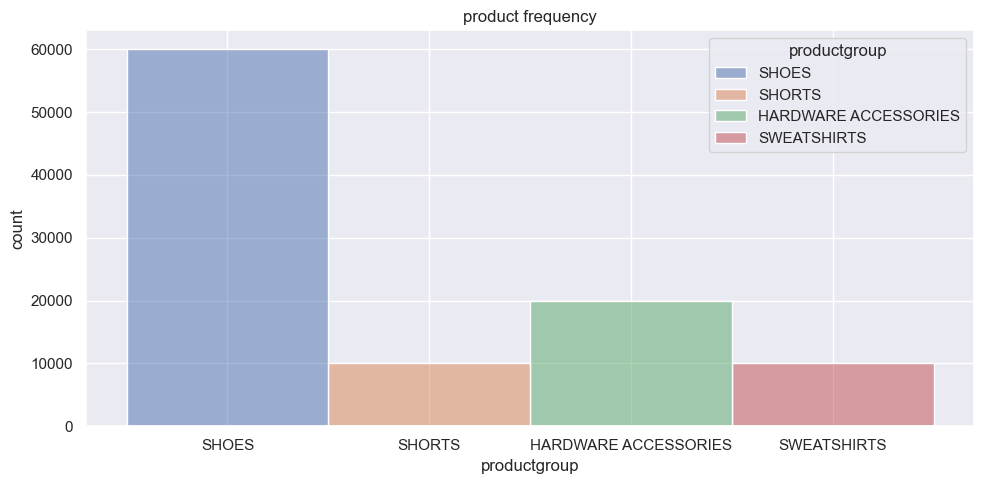

In [131]:
# Create a bar plot to calculate the frequency of each product
plt.figure(figsize=(10, 5))

sns.histplot(data = df, x='productgroup',hue='productgroup')
plt.ylabel('count')
plt.title('product frequency')

save_fig('7-Product_group_frequency')
plt.show()

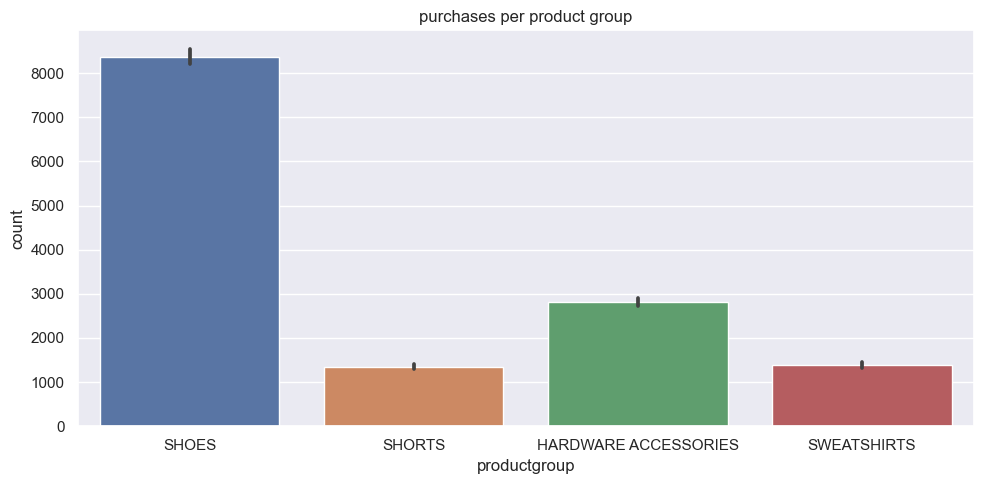

In [140]:
# plot a bar plot to compute how many purchases done in each group
plt.figure(figsize=(10, 5))

sns.barplot(data = df, x= 'productgroup',y='label',estimator='sum')

plt.ylabel('count')
plt.title('purchases per product group')

save_fig('8-Product_group_purchases')
plt.show()

- **Conclusion:** The data in product group seems to be imbalanced
-

product with sales, profit, cost, promos,

- **explore how much product got profits and got sold**
- **Customer_id have alot of unique values, it might not be that useful , also customer might be identical to product**

### Sales & Promotions Analytics

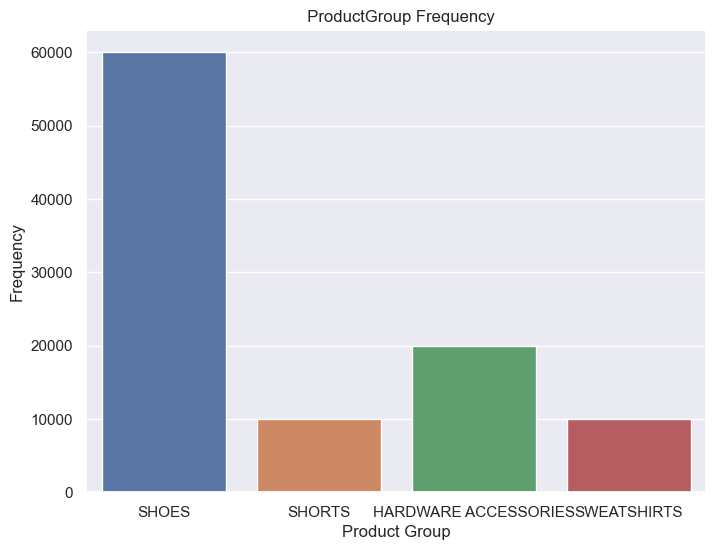

In [119]:
# Plot the frequency of each value in 'productgroup' using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='productgroup')

# Set labels and title
plt.xlabel('Product Group')
plt.ylabel('Frequency')
plt.title('  ProductGroup Frequency')

# Display the plot
plt.show()

Let's check productgroup's frequency for `Sold` item..

In [16]:
# Filter the DataFrame where label is equal to 1
filtered_df = df[df['label'] == 1]

# Calculate the frequency of each value in the 'productgroup' column
freq = filtered_df['productgroup'].value_counts().reset_index()

# Rename the columns
freq.columns = ['productgroup', 'frequency']

# Display the frequency of each value
print(freq)

           productgroup  frequency
0                 SHOES       8374
1  HARDWARE ACCESSORIES       2814
2           SWEATSHIRTS       1389
3                SHORTS       1351


It seems that most sold items were `SHOES`, then `HARDWARE ACCESSORIES ` , pering in mind that data is `imbalanced` in regards of `productgroup `

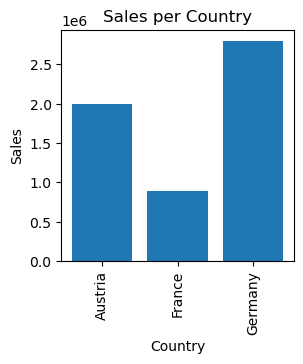

In [20]:
# Group the DataFrame by 'country' column and calculate the total sales
grouped_df = df.groupby('country')['salesPerWeek'].sum()

# Extract the countries and sales values
countries = grouped_df.index
sales = grouped_df.values

# Create a bar plot for sales by country
plt.figure(figsize=(3, 3))
plt.bar(countries, sales)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

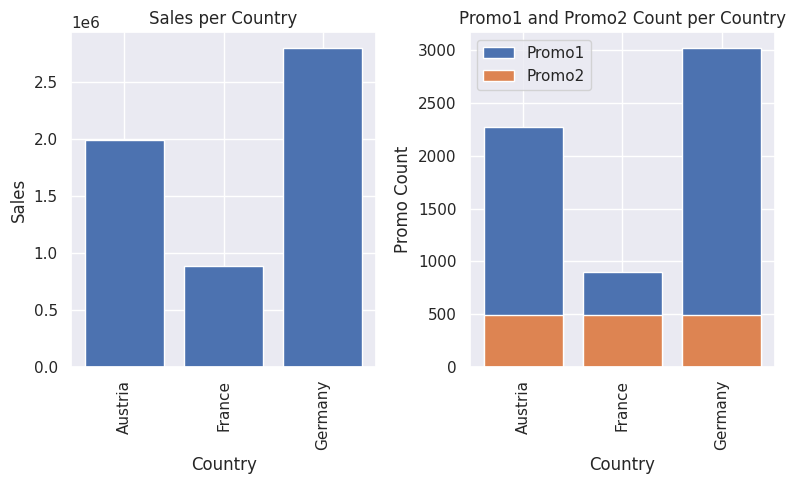

In [36]:
# Group the DataFrame by 'country' column and calculate the total sales
grouped_df_sales = df.groupby('country')['sales'].sum()

# Extract the countries and sales values
countries_sales = grouped_df_sales.index
sales = grouped_df_sales.values

# Create a bar plot for sales by country
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(countries_sales, sales)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Group the DataFrame by 'country' column and calculate the count of promo1 = 1
grouped_df_promo1 = df[df['promo1'] == 1].groupby('country').size()

# Group the DataFrame by 'country' column and calculate the count of promo2 = 1
grouped_df_promo2 = df[df['promo2'] == 1].groupby('country').size()

# Extract the countries and promo1 count values
countries_promo = grouped_df_promo1.index
promo1_count = grouped_df_promo1.values

# Extract the promo2 count values
promo2_count = grouped_df_promo2.values

# Create a bar plot for promo1 and promo2 count by country
plt.subplot(1, 3, 2)
plt.bar(countries_promo, promo1_count, label='Promo1')
plt.bar(countries_promo, promo2_count, label='Promo2')
plt.xlabel('Country')
plt.ylabel('Promo Count')
plt.title('Promo1 and Promo2 Count per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()



**Inference**

- **According to the 1st graph: It is worth noting that the country with the highest sales revenue is Germany, followed by Austria and France, in descending order.**

- **Based on the first and second graphs, it can be observed that there is a strong and positive correlation between sales and promotions. The data suggests that countries with a higher number of promotions tend to have higher sales. In other words, as the number of promotions launched in a country increases, the sales also tend to increase.**

In [37]:
# Group the dataset by country and count the occurrences where promo1 = 1 and promo2 = 1
promo1_counts = df[df['promo1'] == 1].groupby('country').size()
promo2_counts = df[df['promo2'] == 1].groupby('country').size()

# Print the promo1 and promo2 counts for each country
for country in df['country'].unique():
    print(f"Country: {country}")
    print(f"Promo1 Count: {promo1_counts.get(country, 0)}")
    print(f"Promo2 Count: {promo2_counts.get(country, 0)}")
    print()

Country: Austria
Promo1 Count: 2270
Promo2 Count: 0

Country: Germany
Promo1 Count: 3020
Promo2 Count: 0

Country: France
Promo1 Count: 900
Promo2 Count: 490



**While Promo1 had been lauched in all three countries, Promo2 only had been launched in `France`**

Let's measure `Success_rate` of `prmom1` per country , in addition to Success_rate of `prmom2` in `France`

In [38]:
# ***********Success_rate of promo1 ******************

# Get the list of unique countries in the dataset
countries = df['country'].unique()

# Iterate over each country
for country in countries:
    # Filter the dataset for the current country and the desired conditions
    filtered_df = df[(df['country'] == country) & (df['promo1'] == 1) & (df['label'] == 1) & (df['promo2'] == 0)]

    # Calculate the success rate for promo1 in the current country
    success_rate = (len(filtered_df) / len(df[(df['country'] == country) & (df['promo1'] == 1) & (df['promo2'] == 0)])) * 100

    # Print the success rate for the current country
    print(f"Promo1 Success Rate for {country}: {success_rate}%")


# ***********Success_rate of promo2 in France******************

# Calculate the success rate for promo1 in the current country
filtered_df2 = df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['label'] == 1) & (df['promo2'] == 1)]
success_rate2 = (len(filtered_df) / len(df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['promo2'] == 1)] )) * 100
# Print the success rate for the current country
print(f"\nPromo2 Success Rate for France: {success_rate2}%")



Promo1 Success Rate for Austria: 22.86343612334802%
Promo1 Success Rate for Germany: 22.251655629139073%
Promo1 Success Rate for France: 20.759493670886076%

Promo2 Success Rate for France: 43.15789473684211%



According to our data:
- Regarding `Sales`, `promo1` is doing well in 'Germany & Austria' , while `promo2` is doing much beeter in `France`
- **900** `media advertisements -promo1` were launced in France, while
- only **490** `store events- promo2 `, had been conducted.

Yet,
- It's noted that `store events` has **the double Success Rate** of `media advertisements` in `France` ,while it's only the half number.


Ley's illustrate this using graphs..

In [15]:
import plotly.express as px

# Filter the dataset to include only rows with label = 1 and the countries
filtered_df = df[(df['label'] == 1) & (df['country'].isin(countries))]

# Group the filtered DataFrame by 'country' and calculate the sum of promo1 and promo2
grouped_df = filtered_df.groupby('country').agg({'promo1': 'sum', 'promo2': 'sum'}).reset_index()

# Create the Plotly bar chart
fig = px.bar(grouped_df, x='country', y=['promo1', 'promo2'], barmode='group')

# Set the axis labels and chart title
fig.update_layout(xaxis_title='Country', yaxis_title='Promotion Amount', title='Promotions Frequency per Country')

# Show the chart
fig.show()

NameError: name 'countries' is not defined

The figure depicts the distribution of `media advertisements & store events` (promo1 and promo2) across countries within a time period between `2014-12-28 and 2017-04-30`. The data highlights the following:

- In Germany, a total of **672 media advertisements** were launched.
- In Austria, a total of **519 media advertisements** were launched.
- In France, there were **206 media advertisements** and **117 store events** launched.

In [40]:
# Count the number of rows for each combination of promo1 and promo2 values, grouped by country
counts = df.groupby(['country', 'promo1', 'promo2']).size().reset_index(name='count')

# Iterate over the counts DataFrame and print the results for each country
for country in counts['country'].unique():
    country_counts = counts[counts['country'] == country]
    print("Country:", country)
    for index, row in country_counts.iterrows():
        promo1 = row['promo1']
        promo2 = row['promo2']
        count = row['count']
        print(f"Promo1 = {promo1}, Promo2 = {promo2}: {count} rows")
    print()

Country: Austria
Promo1 = 0, Promo2 = 0: 32870 rows
Promo1 = 1, Promo2 = 0: 2270 rows

Country: France
Promo1 = 0, Promo2 = 0: 14180 rows
Promo1 = 0, Promo2 = 1: 380 rows
Promo1 = 1, Promo2 = 0: 790 rows
Promo1 = 1, Promo2 = 1: 110 rows

Country: Germany
Promo1 = 0, Promo2 = 0: 46380 rows
Promo1 = 1, Promo2 = 0: 3020 rows



- In `Austria`, a total of **2270** clients were exclusively reached through media advertisement, while **32870** clients neither received information through media advertisement nor participated in any store events.

- Moreover, in Germany, **3020** clients were solely informed through media advertisement, and **46380** clients did not receive information through media advertisement nor attend any store events.

- Moving on to France, there were **790** clients who solely received information through media advertisement, and out of those, only **390** clients attended store events. Additionally, **110** clients in France were both informed through media advertisement and attended store events. However, there were **14180** clients who did not receive information through media advertisement and did not attend any store events.

In [41]:
# Group the data by MonthOfYear and calculate the total sales and combined promo1+promo2
monthly_sales = df.groupby('MonthOfYear').agg({'sales': 'sum', 'promo1': 'sum', 'promo2': 'sum'})

# Find the month with the highest sales
highest_sales_month = monthly_sales['sales'].idxmax()

# Find the month with the highest combined promo1 and promo2
monthly_sales['Promo1+Promo2'] = monthly_sales['promo1'] + monthly_sales['promo2']
highest_promo_month = monthly_sales['Promo1+Promo2'].idxmax()

# Print the results
print("Month with the highest sales:", highest_sales_month)
print("Month with the highest combined promo1+promo2:", highest_promo_month)

Month with the highest sales: May 2016
Month with the highest combined promo1+promo2: Jul 2015


Let's visulaize these findings for more insights

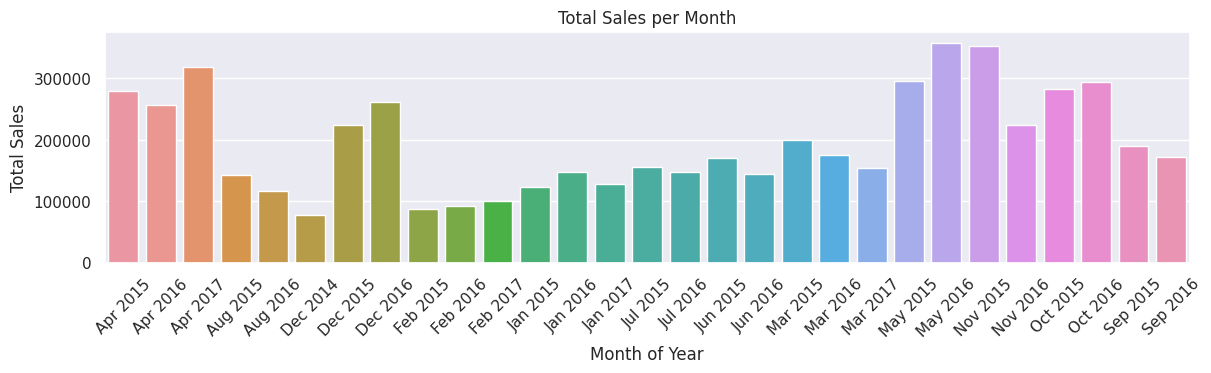

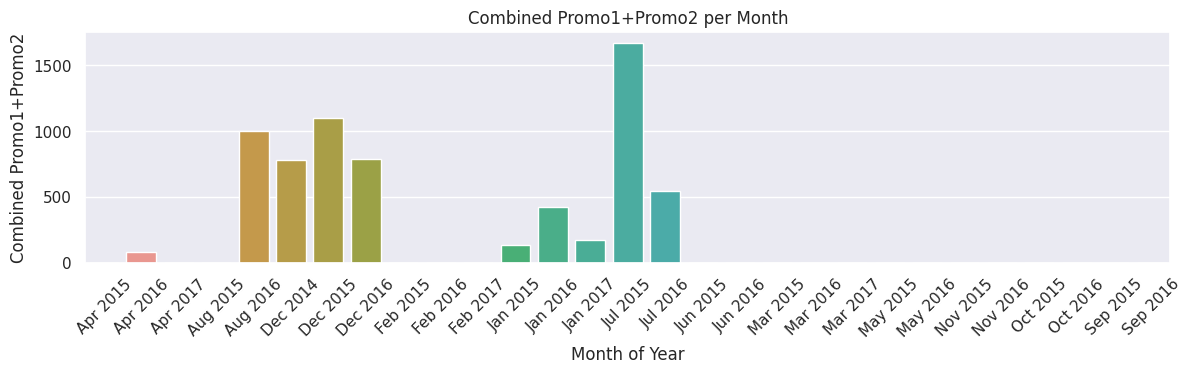

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the total sales and combined promo1+promo2 for each month
plt.figure(figsize=(14, 3))
sns.barplot(x=monthly_sales.index, y='sales', data=monthly_sales)
plt.title('Total Sales per Month')
plt.xlabel('Month of Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.show()


plt.figure(figsize=(14, 3))
sns.barplot(x=monthly_sales.index, y='Promo1+Promo2', data=monthly_sales)
plt.title('Combined Promo1+Promo2 per Month')
plt.xlabel('Month of Year')
plt.ylabel('Combined Promo1+Promo2')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.show()


The company strategically promoted its products during specific periods namely - `August 2015 and 2016`,
- as well as `December 2014, 2015, and 2016`.

These months coincide with the peak of holiday seasons, including [ Christmas, Black Friday, and Cyber Monday] . Consequently, the company observed a slight increase in sales during these promotional periods.

On the other hand, launching campaigns in:
- `January 2015, 2016, and 2017`,
- `April 2015 and February 2017`, and
-  `July 2015 and 2016` (which experienced the highest peak of promotions)

did not yield the same level of sales increase compared to the holiday seasons. Therefore, it is evident that the impact on sales varies between holiday seasons and summer months.

Based on these findings, it is recommended that **the company focuses its campaigns and promotions during the holiday seasons rather than the summer months**.

It is important to take into consideration that the influence of media advertisements and store events may differ from one country to another, with store events having a greater impact in France compared to media advertisements.




### Products & Consumption Behaviors Analytics

In [43]:
# Let's check the top three most sold product for each country

# Group the DataFrame by 'country' column and find the most sold article in each group
most_sold_articles = df.groupby('country')['article'].apply(lambda x: x.value_counts().idxmax())

# Retrieve the rows corresponding to the most sold articles per country
most_sold_rows = df[df.groupby('country')['article'].apply(lambda x: x == x.value_counts().idxmax())]

# Display the most sold article per country along with its related features
for country, article in most_sold_articles.items():
    print(f"Country: {country}")
    print(f"Most Sold Article: {article}")
    print("Related Features:")
    related_features = most_sold_rows[most_sold_rows['country'] == country].drop_duplicates(subset='article')[['article', 'productgroup', 'category', 'gender']]
    print(related_features)
    print()

Country: Austria
Most Sold Article: XC9518
Related Features:
      article productgroup  category gender
58670  XC9518        SHOES  TRAINING  women

Country: France
Most Sold Article: TC9631
Related Features:
      article productgroup  category gender
79420  TC9631        SHOES  TRAINING  women

Country: Germany
Most Sold Article: BX8284
Related Features:
     article productgroup category gender
9317  BX8284        SHOES   INDOOR  women



- Regarding The Best Seller product was:
    - `XC9518` in `Austria`
    - `TC9631` in `France`  
    - `BX8284` in `Germany`

- While the most interested customer segment in the all three countries is `women`, who are interested particaulry in buying `SHOES` , while most common product_category in Austria and France is `Training` , yet in Germany is `Indoor`

Let's get the top 5 best sellers articles per each country ..

In [44]:
# Group the DataFrame by 'country' column and find the most frequent articles in each group
top_articles = df.groupby('country')['article'].value_counts().groupby('country').head(5)

# Iterate over unique countries and display the top frequent articles per country
unique_countries = top_articles.index.get_level_values('country').unique()
for country in unique_countries:
    print(f"********** Country: {country} **********")
    print("Top 5 Most Frequent Articles:")
    articles = top_articles.loc[country]
    for article, count in articles.items():
        print(f"Article: {article}")
        print(f"Count: {count}")
        print("Specifications:")
        specs = df[(df['country'] == country) & (df['article'] == article)][['article', 'regular_price' , 'current_price', 'ratio', 'cost','promo1' , 'promo2' ]].head(1)
        print(specs)
        print()

********** Country: Austria **********
Top 5 Most Frequent Articles:
Article: XC9518
Count: 280
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
58670  XC9518           26.9           16.9    0.6  13.3       1       0

Article: MR4948
Count: 240
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
30990  MR4948           31.9           22.9    0.7  13.3       0       0

Article: PW6278
Count: 230
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
91574  PW6278           63.0           37.0    0.6   9.6       0       0

Article: BC1489
Count: 220
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
33361  BC1489           45.0           16.9    0.4   2.3       1       0

Article: CA2479
Count: 220
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
86692  CA2479            7.0            6.0    0.9   1.

According to the cell below , let's count `Avergae Prices for the 5 Top best sellers per country`

In [45]:
APTBS_austria = (16.9+22.9+37+16.9+6) / 5
APTBS_france =(20.9+25.9+21.9+21.9+23.9) / 5
APTBS_germany = (19.9+52+27.9+24.9+82) /5

print ('APTBS_austria',round(APTBS_austria,2))
print ('APTBS_france',APTBS_france)
print ('APTBS_germany',APTBS_germany)


APTBS_austria 19.94
APTBS_france 22.9
APTBS_germany 41.34


Based on the analysis of average prices for the top five best-selling items in each country, it can be inferred that customers in Germany are willing to pay/afford prices that are approximately twice as expensive as those in France and Austria.
This observation suggests that:
-  There is potential for increased sales in both Austria and France by offering items at lower and clearance price, as well as encourage clearances discounts points,
- While investing more in promotional activities in Germany to target a broader range of customer segments.

In [46]:
column_names = ['regular_price', 'current_price', 'ratio', 'cost']
means = df[column_names].describe().loc['mean']

print("Mean values:")
print(means)

Mean values:
regular_price   52.4
current_price   28.3
ratio            0.5
cost             6.5
Name: mean, dtype: float64


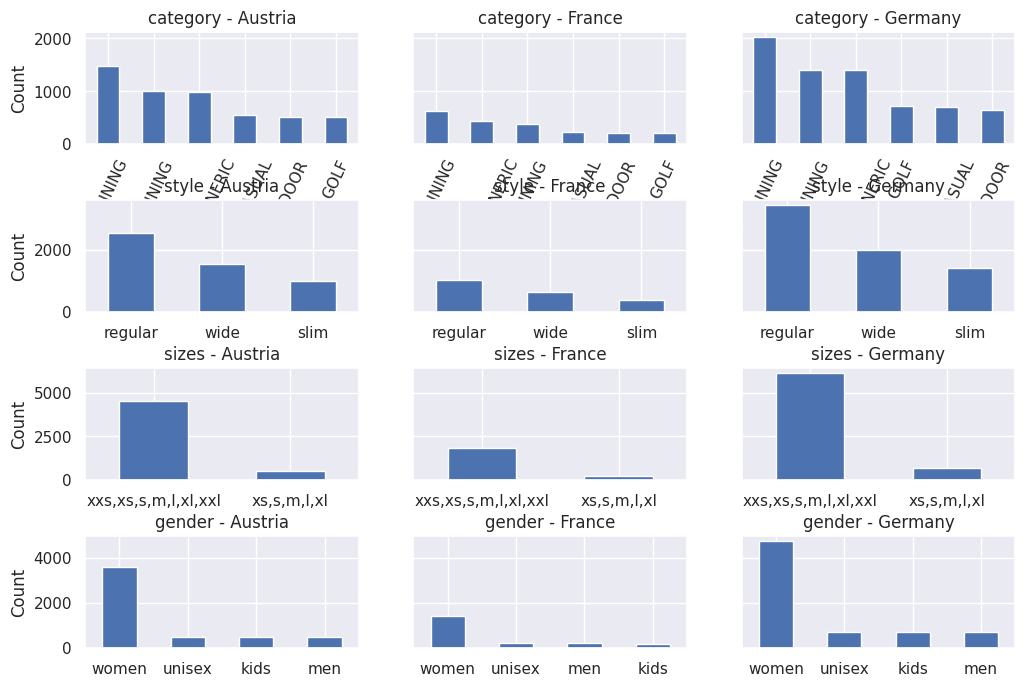

In [47]:

# Group the DataFrame by 'country' column
grouped_df = df.groupby('country')

# Features for subplots
features = ['category', 'style', 'sizes', 'gender']

# Create subplots for each feature and country
fig, axes = plt.subplots(len(features), len(grouped_df), figsize=(12, 8), sharey='row', tight_layout=True, gridspec_kw={'hspace': .5})

# Iterate over the features and create a bar plot for each country
for i, feature in enumerate(features):
    for j, (country, data) in enumerate(grouped_df):
        ax = axes[i, j]
        filtered_data = data[data['label'] == 1]  # Filtered data for label == 1
        counts = filtered_data[feature].value_counts()
        counts.plot.bar(ax=ax)
        ax.set_title(f'{feature} - {country}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        if i != 0:
            ax.set_xticklabels(counts.index, rotation=0)  # Set x-axis tick labels horizontally
        else:
            ax.set_xticklabels(counts.index, rotation=65)  # Set x-axis tick labels vertically for the first row

# Display the plot
plt.show()

- The customers in all three countries have the same consumbtion behavior that:
   - `Training` , `regular`,`xxs,xs,s,m,l,xl,xxl`, while the target segment in all three countries should be `Women`.
- Peering in mind that `France` is the less consumption behavior comparing to Germany and Austria , thus more promos need to be launched in France.

### Time Series Analytics

In [48]:
############ Plot: Count of Promo1 and Promo2 Occurrences by RetailWeek per Country #############

# Filter the data where promo1 is 1 or promo2 is 1
filtered_data = df[(df['promo1'] == 1) | (df['promo2'] == 1)]

# Calculate the count of promo1 or promo2 occurrences for each unique RetailWeek value and Country
week_counts = filtered_data.groupby(['MonthOfYear', 'country'])['promo1', 'promo2'].sum().reset_index()

# Create a bar plot using plotly
fig = go.Figure()

# Add trace for promo1 count
fig.add_trace(go.Bar(
    x=week_counts['MonthOfYear'],
    y=week_counts['promo1'],
    name='Promo1',
    hovertemplate='Count: %{y}<br>Country: %{text}',
    text=week_counts['country']
))

# Add trace for promo2 count
fig.add_trace(go.Bar(
    x=week_counts['MonthOfYear'],
    y=week_counts['promo2'],
    name='Promo2',
    hovertemplate='Count: %{y}<br>Country: %{text}',
    text=week_counts['country']
))

# Set the title and labels
fig.update_layout(
    title='Count of Promo1 and Promo2 Occurrences by RetailWeek per Country',
    xaxis=dict(title='RetailWeek'),
    yaxis=dict(title='Count')
)

# Show the plot
fig.show()

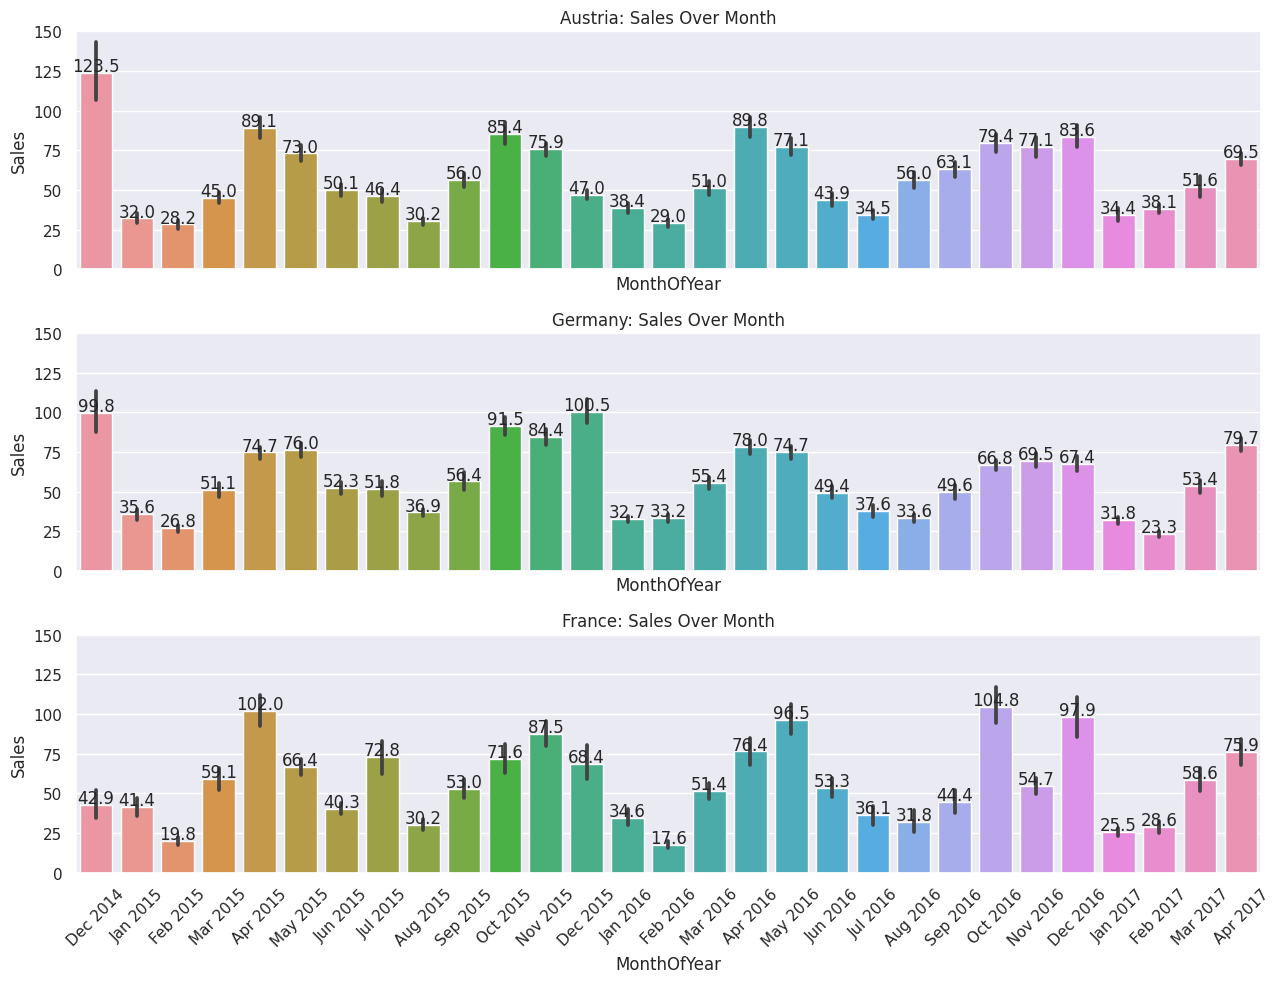

In [49]:
############ Plot:  Sales Over Months per Country #############

# Create a figure with subplots for each country
fig, axes = plt.subplots(len(countries), 1, figsize=(13, 10), sharex=True)

# Iterate over the countries and plot the bar plots
for i, country in enumerate(countries):
    # Filter the data for the current country
    country_data = df[df['country'] == country]

    # Plot the bar plot with labels over MonthOfYear
    sns.barplot(data=country_data, x='MonthOfYear', y='sales', ax=axes[i])
    axes[i].set_title(f'{country}: Sales Over Month')

    # Add labels over the bars
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')

        # Set y-axis limit
        axes[i].set_ylim([0, 150])

        # Add y-axis label
        axes[i].set_ylabel('Sales')

        # Rotate x-axis labels
        axes[i].tick_params(axis='x', rotation=45)

# Set x-axis label on the last subplot
axes[-1].set_xlabel('MonthOfYear')


# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()

It's Noted that :

- The `sales` variable exhibits:
   - A `sharp decrease` in **January and February,** , which does make since as there are two main sales periods in Europe:
      - Winter sales, which usually start on the second Wednesday of January and last four weeks.
      -  Summer sales, which begin on the last Wednesday of June and last four weeks.

   - A `high increase`  in the months of ** October, November and Decemeber** each year. the peak in Novermber and December can be explaines in regards of the holiday season
         - Christmas Season: which lasts for just a few days after Christmas (usually on 27th and 28th of December every year).
         - Black Friday which is usually on the fourth Friday of November every year.
         - Cyber Monday which is on the Monday immediately after Black Friday.

Thus
It's highly recommended to launch `media advertisement & store events` during month with high-shopping peaks as **October, November and Decemeber** then **April ,and May**

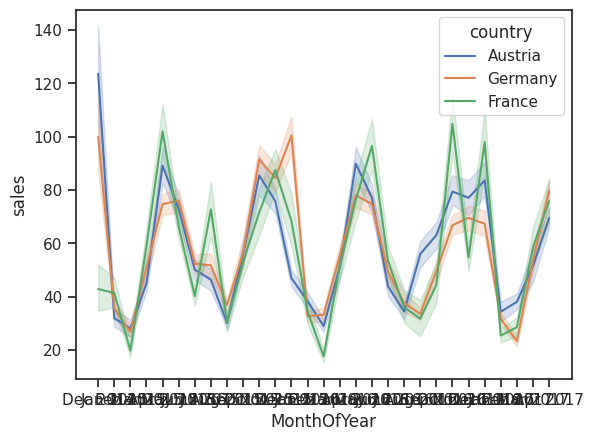

In [50]:
# Create a line plot using seaborn
sns.set(style="ticks")
fig = sns.lineplot(data=df, x='MonthOfYear', y='sales', hue='country')

# Get the line plot data from the seaborn figure
lines = fig.get_lines()

# Create a trace for each line
traces = []
for line, country in zip(lines, countries):
    x = line.get_xdata()
    y = line.get_ydata()
    trace = go.Scatter(x=x, y=y, name=country)
    traces.append(trace)

# Define the layout
layout = go.Layout(
    title='Sales Over Months - Similar Consumption Behavior',
    xaxis=dict(title='MonthOfYear'),
    yaxis=dict(title='Sales', range=[0, 150])
)

# Create the figure with data and layout
fig = go.Figure(data=traces, layout=layout)

# Add hover labels for sales numbers
fig.update_traces(hovertemplate='Sales: %{y}')

# Show the plot
fig.show()

**The graph indicates that the three countries almost have the same pattern of consumption behavior**

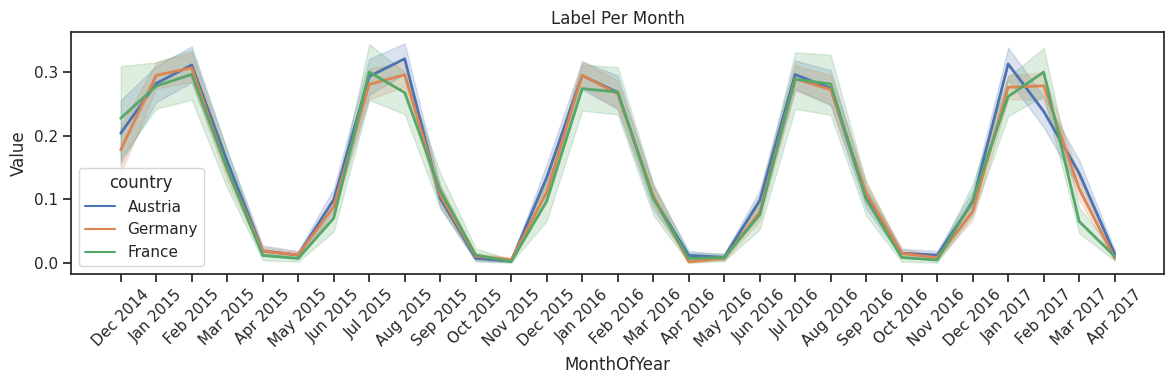

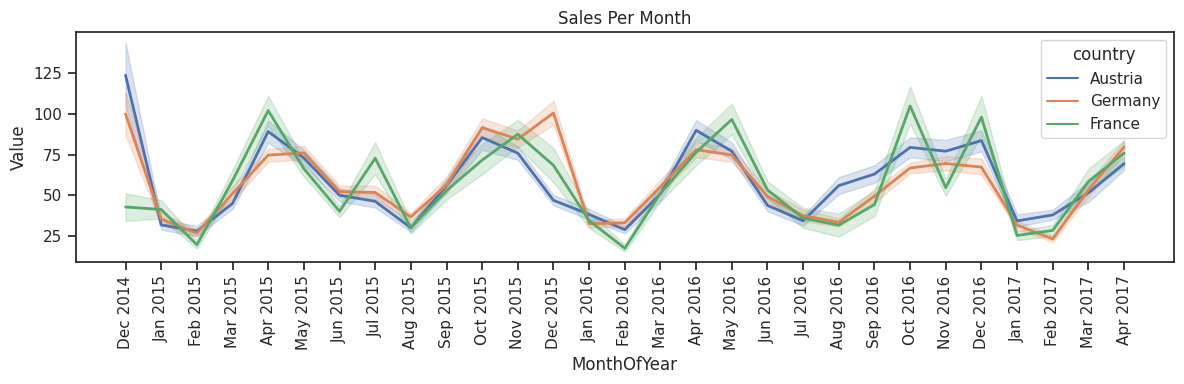

In [51]:
############## plot: Sales vs Labels Per Month ######################

# create a figure with one axis for label per month
fig1, ax1 = plt.subplots(figsize=(12, 4))

# plot label per month for all countries
sns.lineplot(data=df, x='MonthOfYear', y='label', hue='country', linewidth=2, ax=ax1)

# set the title and labels for the plot
ax1.set_title('Label Per Month')
ax1.set_xlabel('MonthOfYear')
ax1.set_ylabel('Value')

# rotate the x-axis labels by 45 degrees
ax1.tick_params(axis='x', labelrotation=45)

# adjust the layout to prevent overlapping
plt.tight_layout()

# create a figure with one axis for sales per month
fig2, ax2 = plt.subplots(figsize=(12,4))

# plot sales per month for all countries
sns.lineplot(data=df, x='MonthOfYear', y='sales', hue='country', linewidth=2, ax=ax2)

# set the title and labels for the plot
ax2.set_title('Sales Per Month')
ax2.set_xlabel('MonthOfYear')
ax2.set_ylabel('Value')

# rotate the x-axis labels by 45 degrees
ax2.tick_params(axis='x', labelrotation=90)

# adjust the layout to prevent overlapping
plt.tight_layout()

# show both plots
plt.show()

**The graph illustrates an inverse relationship between the label and sales variables. As the label increases, the sales decrease, and vice versa.**

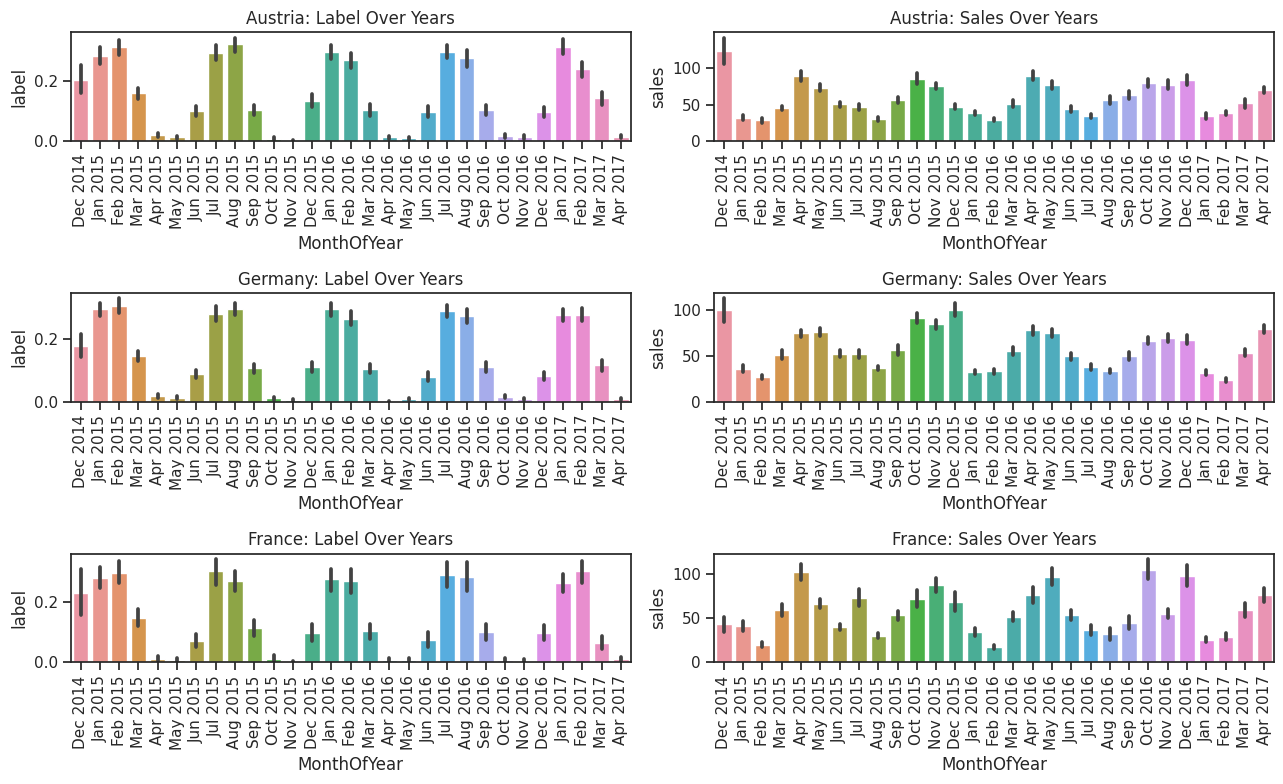

In [52]:
############## plot: Sales vs Labels Per Month ######################

# create a figure with six axes arranged in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(13, 8))

# flatten the axes array for easier indexing
axes = axes.flatten()

# iterate over the countries and plot the bar plots
for i, country in enumerate(countries):
    sns.barplot(data=df[df['country'] == country], x='MonthOfYear', y='label', ax=axes[i*2])
    axes[i*2].set_title(f'{country}: Label Over Years')

    sns.barplot(data=df[df['country'] == country], x='MonthOfYear', y='sales', ax=axes[i*2+1])
    axes[i*2+1].set_title(f'{country}: Sales Over Years')

    # rotate the x-axis labels by 45 degrees
    axes[i*2].tick_params(axis='x', labelrotation=90)
    axes[i*2+1].tick_params(axis='x', labelrotation=90)

# adjust the layout and spacing of the subplots
plt.tight_layout()

# show the plot
plt.show()
